    Author: Eswar Lakshminarayanan

### Level 5

    In this notebook, we have performed k means clustering for level B1 data. Here Level 5 data means, people who have spent time only level 5 of the Art Galley 

#### Reading Entire Level 5 Data

In [1]:
import pandas as pd 
from sklearn import metrics
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import folium
import folium.plugins as plugins
from folium.plugins import HeatMap
df = pd.read_csv("../pre_processing11/level5_coordinates_only.csv",header=0)
df.head(3)

,lat,lng
0,1.290857,103.85172
1,1.290855,103.85172
2,1.290855,103.85172


In [2]:
df.shape

(2937780, 2)

### Intuitive method to come up with a range for (k) clusters

    - here we are plotting a heatmap for the level data using the below code. 
    - Since the size of the html file generated my heatmap is huge, it is not rendered on jupyter notebook but only on firefox browser
    - Here is the code that is used to generate the heatmap
    
```m = folium.Map(lat_lon[0][0:2], tiles='OpenStreetMap', zoom_start=20)
HeatMap(lat_lon,radius=7,max_zoom=28).add_to(m)
m.save('/home/opc/level5.html')```

    - Below is the picture of heatmap prdouced for level 5. 
    - The picture below clearly shows that there are around 3 to 5 spots wwhere the density is quite high
    


<img src="http://drive.google.com/uc?export=view&id=1fICp9MiGnFX23y0uariVhyKRepxdFuDh">


### Training kmeans model with different k values for clusters

In [3]:
centers_ = []
Sum_of_squared_distances = []
range_n_clusters = [2,3,4]
for n_clusters in range_n_clusters:
    print("number of clusters:", n_clusters)
    clusterer = KMeans (n_clusters=n_clusters, init='k-means++', n_init=5, max_iter=300, tol=0.0001, verbose=1,precompute_distances='auto', random_state=3192, copy_x=True, n_jobs=1, algorithm='auto')
    clusterer.fit(df)
    centers = clusterer.cluster_centers_.tolist()
    centers_.append(centers)
    Sum_of_squared_distances.append(clusterer.inertia_)

number of clusters: 2
Initialization complete
start iteration
done sorting
end inner loop
Iteration 0, inertia 0.012631779996654758
start iteration
done sorting
end inner loop
Iteration 1, inertia 0.010164675844893308
start iteration
done sorting
end inner loop
Iteration 2, inertia 0.009939210809426453
start iteration
done sorting
end inner loop
Iteration 3, inertia 0.009936165492898157
center shift 6.023816e-07 within tolerance 6.024166e-13
Initialization complete
start iteration
done sorting
end inner loop
Iteration 0, inertia 0.00995051588411769
start iteration
done sorting
end inner loop
Iteration 1, inertia 0.009936190577592026
start iteration
done sorting
end inner loop
Iteration 2, inertia 0.009936157829425066
center shift 5.406212e-08 within tolerance 6.024166e-13
Initialization complete
start iteration
done sorting
end inner loop
Iteration 0, inertia 0.01005356172991688
start iteration
done sorting
end inner loop
Iteration 1, inertia 0.009937492299896208
start iteration
done s

Iteration 4, inertia 0.00244595856902443
start iteration
done sorting
end inner loop
Iteration 5, inertia 0.0024393504155592145
start iteration
done sorting
end inner loop
Iteration 6, inertia 0.0024374490326498142
start iteration
done sorting
end inner loop
Iteration 7, inertia 0.002437081354043223
start iteration
done sorting
end inner loop
Iteration 8, inertia 0.0024368564854459116
start iteration
done sorting
end inner loop
Iteration 9, inertia 0.002436788559732197
center shift 5.341074e-07 within tolerance 6.024166e-13
Initialization complete
start iteration
done sorting
end inner loop
Iteration 0, inertia 0.0025228521945620955
start iteration
done sorting
end inner loop
Iteration 1, inertia 0.002459314034553578
start iteration
done sorting
end inner loop
Iteration 2, inertia 0.002447573382370188
start iteration
done sorting
end inner loop
Iteration 3, inertia 0.0024398423430129013
start iteration
done sorting
end inner loop
Iteration 4, inertia 0.0024375640632178686
start iterati

### Plotting Inertia vs Number of Cluster(k)

    Inertia: Sum of squared distances of samples to their closest cluster center. Here, lower inertia means, the closer/tighter the cluster is. Based on the graph below, we will select the clusters with lowest inertia.

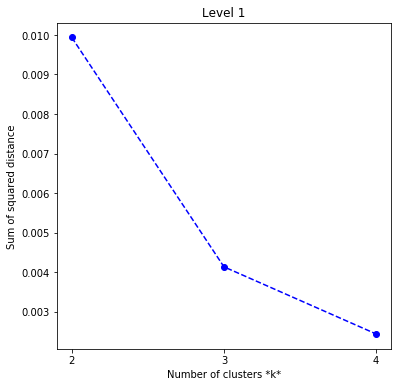

In [5]:
import matplotlib.pyplot as plt 
import numpy as np
%matplotlib inline
plt.figure(figsize=(6, 6))
plt.plot(range_n_clusters, Sum_of_squared_distances,linestyle='--', marker='o', color='b')
plt.xticks(np.arange(min(range_n_clusters), max(range_n_clusters)+1, 1.0))
plt.title("Level 1")
plt.xlabel(r'Number of clusters *k*')
plt.ylabel('Sum of squared distance')
plt.savefig("level_lB1_elbow")
plt.show()

#### Here are the cluster centroids for the K clusters with minimum inertia
    
    In our case k = 4 has the minimum inertia, as you could see on the graph above

In [8]:
centroids = centers_[-2]
centroids

[[1.2908612554656211, 103.85171866808118],
 [1.2907414520305993, 103.85160205089832],
 [1.290528799629442, 103.85154471040923]]

#### Now let's plot the centroids and see how close they are to high density areas in out heatmap 

In [9]:

m = folium.Map(centroids[0], tiles='OpenStreetMap', zoom_start=25)

for i in range(0,len(centroids)):
    folium.Circle(location=[centroids[i][0], centroids[i][1]],radius=5,color='crimson',fill=True,fill_color='crimson').add_to(m)
m

### For comparsion purpose, plotting heatmap and clusters centroids side by side
    
    - As you can see most cluster centroids, overlap the high density areas on heatmap

  <tr>
    <td> <img src="http://drive.google.com/uc?export=view&id=1fICp9MiGnFX23y0uariVhyKRepxdFuDh" alt="Drawing" style="width: 500px;"/> </td>
    <td> <img src="http://drive.google.com/uc?export=view&id=1ZAdwBHWuD8LCLUAm9OE9UnlxEuwBQPqu" alt="Drawing" style="width: 500px;"/> </td>
    </tr>
    